# 🏦 Bank Customer Churn Analysis

This notebook explores the Bank Customer Churn dataset with the goal of uncovering insights to help the bank enhance its customer retention strategies.

Customer churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its services. For banks, retaining customers is critical for maintaining long-term profitability and fostering customer loyalty.

## 🎯 Objective
The primary objective of this analysis is to:

- Understand the factors influencing churn

- Identify patterns in customer behavior and demographics

- Support the development of strategies to reduce churn and improve retention

## 📦 Dataset: 
### [Bank Churn Data](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

The dataset contains information on bank customers, including:

- Demographic data (e.g., age, gender, geography)

- Account details (e.g., balance, tenure, credit score)

- Product and service usage (e.g., number of products, card type, activity status)

- A target variable Exited, indicating if a customer has churned (1) or not (0)



## 📊 Notebook Workflow
The notebook follows these key steps:

**Data Loading & Initial Exploration**
Load the dataset, check data types, structure, and identify any missing values.

**Exploratory Data Analysis (EDA)**
Dive deeper into patterns and trends across customer segments using visualizations and descriptive statistics.

**Churn Insights & Correlations**
Analyze how factors like age, tenure, satisfaction, geography, and product engagement relate to churn.


In [429]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

--- 

## Data Loading and Exploration

In [2]:
data=pd.read_csv(r"C:\Users\harsh\Downloads\archive (2)\Customer-Churn-Records.csv") #importing the data set from the machine  

In [9]:
data.sample(5)# checking the data by genreating random 5 row sample

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
180,181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0,0,5,GOLD,739
5469,5470,15678571,Barber,723,France,Male,21,4,0.00,2,0,0,24847.02,0,0,1,SILVER,823
4793,4794,15787322,Yeh,788,France,Female,41,6,0.00,1,1,1,25571.37,0,0,2,SILVER,718
5188,5189,15691910,Lu,663,Spain,Male,30,4,0.00,3,1,0,101371.05,0,0,1,DIAMOND,604
8967,8968,15579131,Ricci,835,France,Male,25,7,0.00,2,1,1,83449.65,0,0,3,SILVER,343


In [8]:
print("Number of Rows: ",data.shape[0])# checking the number of rows 
print("Number of Columns: ",data.shape[1])# checking the number of columns 

Number of Rows:  10000
Number of Columns:  18


In [430]:
#Checking to see if the data contains any null values
data.isnull().sum() # checking for null values in the data

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Satisfaction level    0
AgeGroup              0
Satisfactionlevel     0
dtype: int64

In [13]:
data.info() #Getting the information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [14]:
data.describe()#checking the statistics

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [16]:
# Getting the list of Categorical and numberical columns in the dataset
cat_var=[]
num_var=[]
for i in data.columns:
    if data[i].nunique()>10:
        num_var.append(i)
    else:
        cat_var.append(i)

In [18]:
print(cat_var)# Categorical Value in the dataset

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


In [332]:
print(num_var)# Numerical Values in the dataset We can exclude the values which are not relevant such as Surname.

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']


In [264]:
# creating a dictionry to map the Satisfaction level with the SatisfactionScore
rating_mapping={
        1:'Very dissatisfied',
        2:'Dissatisfied',
        3: 'Neutral',
        4: 'Satisfied',
        5: 'Very satisfied '
}
data["Satisfactionlevel"] =data['Satisfaction Score'].map(rating_mapping)

In [263]:
#Grouping age according to the age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=['<20', '20-30', '30-40', '40-50', '50-60','60+'])

--- 

##  Exploratory Data Analysis (EDA):

## 📊 Insights from Chart 1 & 2

As seen in Chart 1, a little over 20% of customers have churned from the bank, while the bank successfully retained approximately 79% of its customer base.

In Chart 2, we explore the satisfaction levels of the customers who exited. Notably, over 40% of churned customers reported a satisfaction level below "Dissatisfied."

This strongly suggests that customer satisfaction played a significant role in the churn rate. Improving satisfaction could be a key lever for reducing future customer exits.

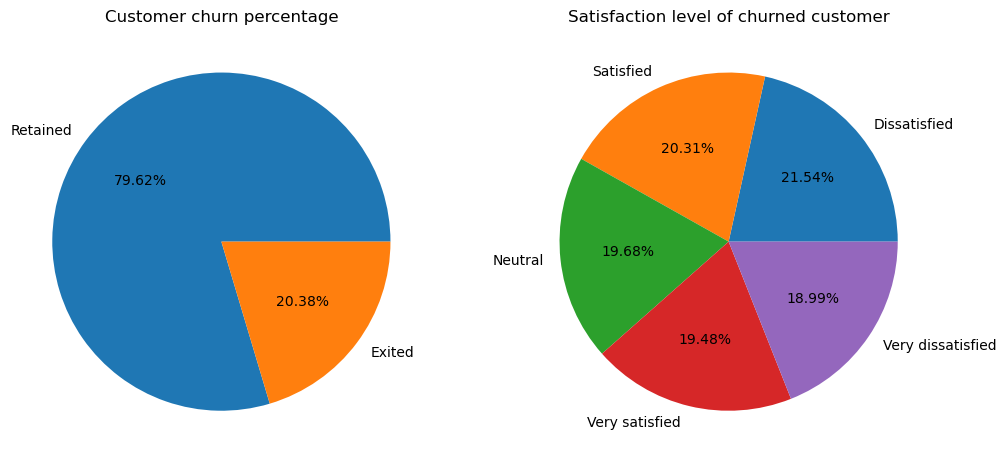

In [432]:
# Checking the percentage of customers Exited and Satisfaction percentage of those customers
f,axes=plt.subplots(1,2,figsize=(12,6))
data['Exited'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['Retained','Exited'],title='Customer churn percentage',ylabel='',ax=axes[0])
data[data['Exited']==1].Satisfactionlevel.value_counts().plot(kind='pie',autopct="%1.2f%%",ylabel='',ax=axes[1],title='Satisfaction level of churned customer')
plt.show()

--- 

## 🌍 Geographic Analysis: Charts 3 & 4
Chart 3 visualizes the distribution of the bank’s customers across three countries. It’s evident that France accounts for nearly half of the total customer base.

Chart 4, along with the supporting table, highlights the churn and retention figures by geography. From this, we can see:

Germany has the highest churn rate at 32.4%

Spain follows with 16.7%

France has the lowest churn rate at 16.2%, despite having the largest share of customers

These insights suggest that while France holds the bank's largest customer base, it is also the most stable market in terms of customer retention. In contrast, Germany appears to be a key area of concern with significantly higher churn, indicating potential issues in customer experience, product fit, or competitive pressure in that region.

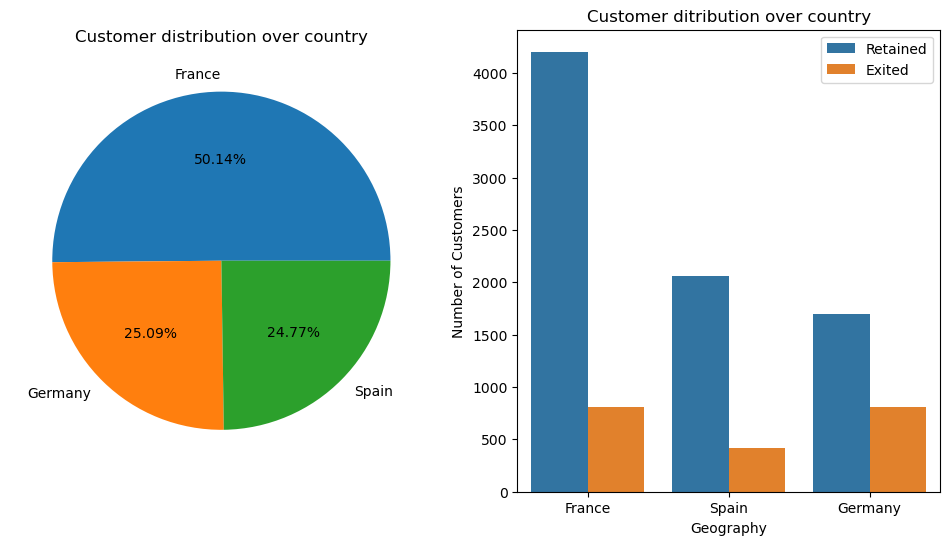

,Exited
Geography,
France,0.161747
Germany,0.324432
Spain,0.166734


In [440]:
# checking which country has the highest number of customers and churn rate by georaphy
f ,axes=plt.subplots(1,2,figsize=(12,6))

data['Geography'].value_counts().plot(kind='pie',autopct="%1.2f%%",ax=axes[0],title='Customer distribution over country',ylabel='')
plt.title('Customer ditribution over country')

sns.countplot(data=data,x='Geography',hue='Exited',ax=axes[1])
plt.ylabel('Number of Customers')
plt.legend(labels=['Retained','Exited'])
plt.show()                               
Retention_geography=data.groupby('Geography')['Exited'].mean().to_frame()
Retention_geography

--- 

## 👤 Age-Based Churn Analysis: Chart 5
Chart 5 presents the density distribution of customer age, comparing those who churned versus those who remained with the bank.

From the visualization, it's clear that:

Younger customers tend to stay with the bank.

Older customers, particularly those in the 50–60 age group, are significantly more likely to churn.

The accompanying table reinforces this insight:

Over 50% of the churned customers fall within the 50–60 age group.

This is followed by the 40–50 age group, accounting for approximately 34% of the churn.

These findings indicate a strong age-related churn pattern. The bank may need to explore targeted retention strategies or tailored offerings for older demographics to reduce churn in this segment.

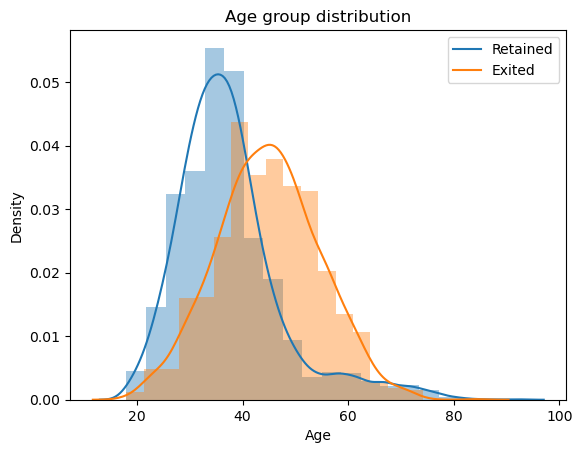

,Exited
AgeGroup,
<20,0.056180
20-30,0.076104
30-40,0.121096
40-50,0.339655
50-60,0.562108
60+,0.247845


In [367]:
#Age distribution of the customers 
sns.distplot(data[data['Exited']==0].Age,bins=20)
sns.distplot(data[data['Exited']==1].Age,bins=20)
plt.title('Age group distribution')
plt.legend(labels=['Retained','Exited'])
plt.show()
Retention_age=data.groupby('AgeGroup')['Exited'].mean().to_frame()
Retention_age

--- 

## 👥 Gender-Based Customer Distribution and Churn: Chart 6
Chart 6 illustrates the distribution of customers by gender. While male customers make up a larger portion of the overall customer base, the data reveals an interesting contrast:

A higher number of female customers have churned compared to males.

The churn rate for female customers is 25%, which is almost 10 percentage points higher than that of male customers, whose churn rate stands at 16.5%.

This suggests that female customers are more likely to exit the bank, despite being a smaller segment overall. It may be worth investigating underlying factors—such as satisfaction, product alignment, or service experience—that contribute to this disparity.



,Exited
Gender,
Female,0.250715
Male,0.164743


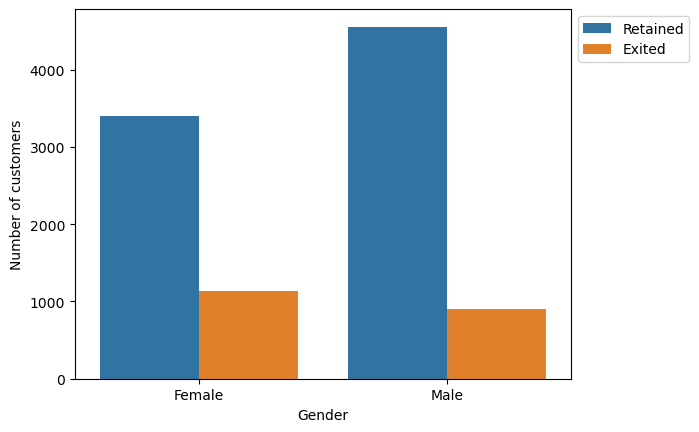

In [442]:
#churn rate by gender
sns.countplot(data=data,x='Gender',hue='Exited')# checking the number of female and male based on the Churn
plt.legend(labels=['Retained','Exited'],loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of customers')
Retentionrate_gender=data.groupby('Gender')['Exited'].mean().to_frame()
Retentionrate_gender

--- 

## ⏳ Tenure and Gender-Based Churn: Chart 7
Chart 7, a box plot, illustrates the tenure distribution of male and female customers, with a focus on churn behavior.

Key insights:

Tenure appears to influence churn differently across genders.

Among female customers, those who churned had a higher tenure compared to those who stayed.

In contrast, male customers who churned generally had shorter tenures, indicating that early-stage disengagement may be more common among men.

Interestingly, while the average tenure is similar across genders, male customers tend to have a slightly wider range and higher upper-end tenure compared to females.

This suggests that tenure impacts churn differently by gender, and retention strategies may need to be tailored accordingly — focusing on long-term engagement for females and improving early onboarding experiences for male customers.



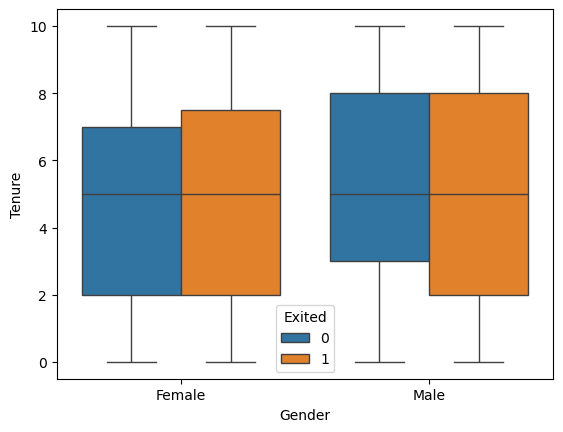

In [377]:
sns.boxplot(x=data['Gender'],y=data['Tenure'],hue=data['Exited'])# checking the tenure of male vs female
#Female population that exited had a higher tenure as compared to the male counterpart. 
plt.show()

--- 

## 💳 Card Type and Churn Behavior: Charts 8 & 9
Chart 8 displays the distribution of customers across different card types, along with their associated churn rates. Notably:

Customers with the Diamond card show a slightly higher churn rate (22%) compared to the other three card types, which have similar and lower churn rates.

While the difference is not drastic, it does suggest that card type may influence churn behavior.

To explore this further, Chart 9 presents a heatmap showing the relationship between card type and customer satisfaction.

The heatmap reveals a clear trend: Diamond card holders are more likely to report a "Dissatisfied" satisfaction level compared to holders of other cards.

This correlation indicates that customer experience tied to the Diamond card may be contributing to higher churn. It could point to a mismatch in expectations, benefits, or service quality associated with that card tier — an area worth deeper analysis and potential intervention.

Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64

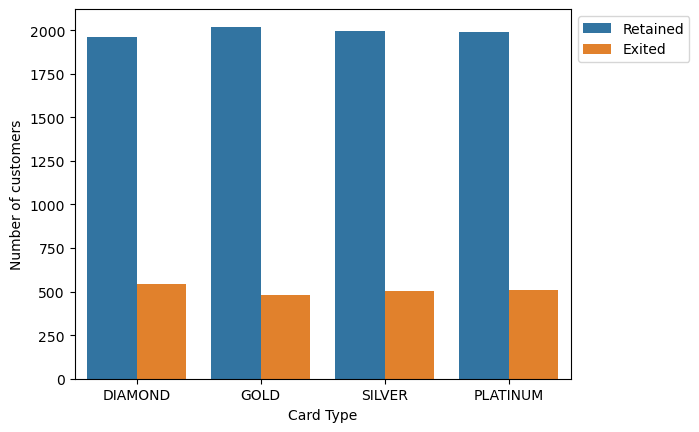

In [443]:
sns.countplot(data=data,x='Card Type',hue='Exited')
plt.legend(labels=['Retained','Exited'],loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of customers')
data.groupby('Card Type')['Exited'].mean()

<Axes: xlabel='Card Type', ylabel='Satisfaction level'>

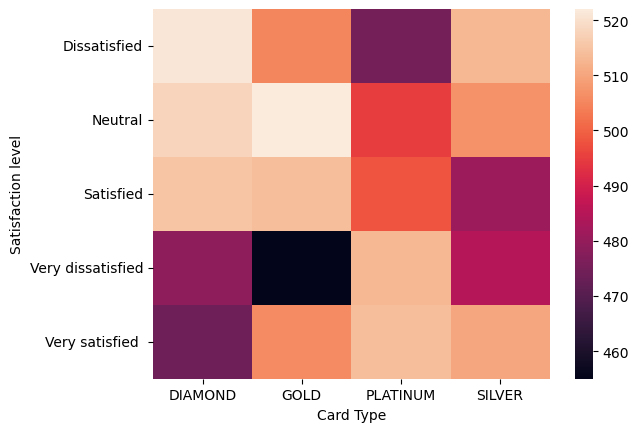

In [303]:
sns.heatmap(pd.crosstab(data['Satisfaction level'],data['Card Type']))

--- 

## 🔄 Customer Activity and Churn: Chart 10
Chart 10 visualizes the relationship between customer activity status and churn. The insight is striking:

Over 60% of the customers who churned were marked as inactive.

This indicates a strong correlation between inactivity and churn, suggesting that customer engagement plays a critical role in retention. Inactive customers are significantly more likely to leave, highlighting the importance of proactive engagement strategies, such as reactivation campaigns or targeted outreach.

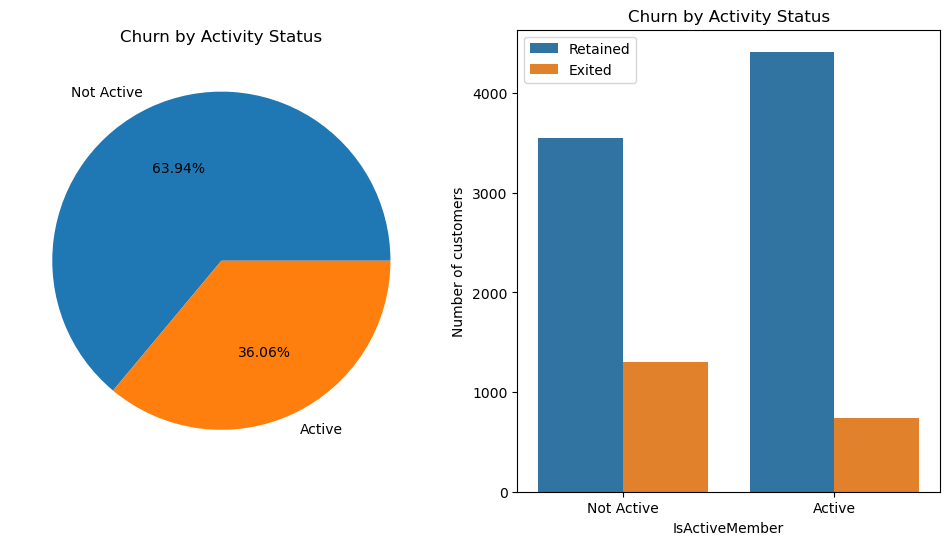

In [452]:
#Customer Activity and Churn
f ,axes=plt.subplots(1,2,figsize=(12,6))

data[data['Exited']==1].IsActiveMember.value_counts().plot(kind='pie',autopct="%1.2f%%",ax=axes[0],title='Churn by Activity Status',labels=['Not Active','Active'],ylabel='')
plt.title('Churn Activity Status')

sns.countplot(data=data,x='IsActiveMember',hue='Exited',ax=axes[1])
plt.xticks([0,1],['Not Active','Active'])
plt.legend(labels=['Retained','Exited'])
plt.title('Churn by Activity Status')
plt.ylabel('Number of customers')
plt.show()     


--- 

## 🛍️ Number of Products vs. Churn Rate: Chart 11
Chart 11 displays the distribution of customers based on the number of products they hold, along with their corresponding churn rates.

Key findings:

The majority of customers hold 2 products, and this group shows a relatively low churn rate, indicating a more stable and engaged segment.

However, the churn rate sharply increases with the number of products:

Customers with 4 products—though a small group—have a 100% churn rate.

Those with 3 products follow closely with a churn rate of 83%.

These results suggest that holding more products doesn't necessarily correlate with loyalty—in fact, it may indicate overextension, dissatisfaction, or unmet expectations. This could warrant further investigation into the quality of product engagement or bundling strategies used for multi-product customers.



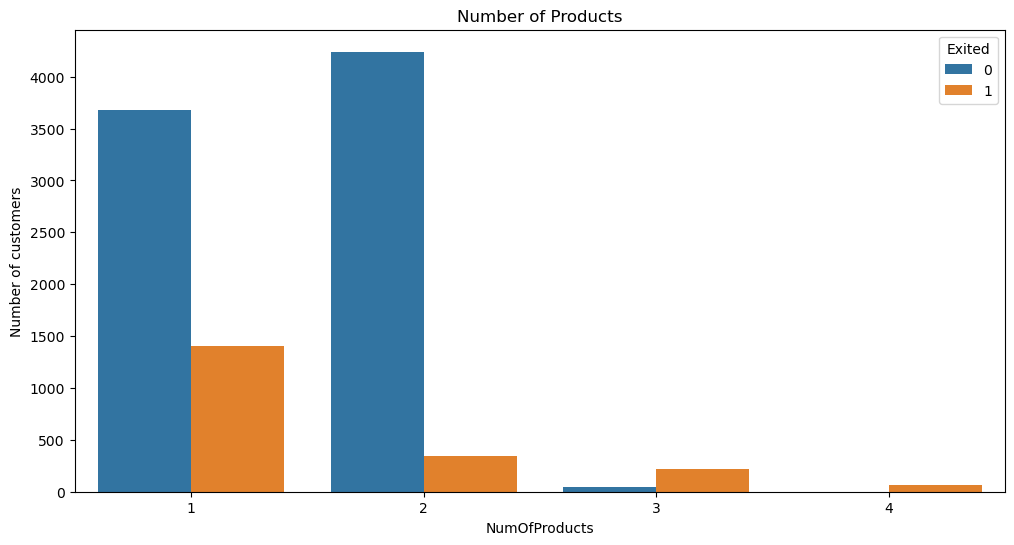

,Exited
NumOfProducts,
1,0.277144
2,0.076035
3,0.827068
4,1.000000


In [453]:
# Distribution by number of product
plt.figure(figsize=(12, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Number of Products')
plt.ylabel('Number of customers')
plt.show()
#Checking the percentage of customer churn as per their number of products
Retention_Pro=data.groupby('NumOfProducts')['Exited'].mean().to_frame()
Retention_Pro

--- 

## 💳 Credit Card Ownership Among Churned Customers: Chart 12
Chart 12, a pie chart, illustrates the proportion of churned customers who held a credit card with the bank.

Key takeaway:

70% of the churned customers had a credit card, while only 30% did not.

<Axes: >

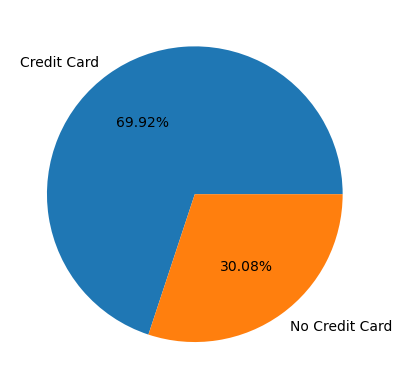

In [406]:
# Portion of the Churned customers that are Credit card holder
data[data['Exited']==1].HasCrCard.value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['Credit Card','No Credit Card'],ylabel='')

--- 

## 💳 Credit Card Ownership by Satisfaction Level (Churned Customers)
Among the customers who churned, the proportion who held a credit card by satisfaction level is as follows:


Satisfaction Level	% with Credit Card
- Very dissatisfied 	:   73.4%
- Satisfied	        :  71.3%
- Dissatisfied	    :  69.5%
- Neutral	            :  68.1%
- Very satisfied	    :  67.5%

## 🔍 Insight:
Churned customers across all satisfaction levels had a high rate of credit card ownership (67–73%).

Interestingly, those who were very dissatisfied had the highest credit card ownership (73.4%).

Even very satisfied churned customers had a fairly high credit card ownership (67.5%), suggesting that having a credit card doesn’t prevent churn on its own.

## 🧠 What this suggests:
While credit card ownership is high among churned customers across the board, it's not clearly linked to satisfaction level — indicating that simply offering a credit card might not be enough to drive loyalty. Other factors (e.g., card benefits, service experience, product mix) might be more influential.


In [422]:
#average credit card ownership among churned customers, grouped by satisfaction level.
data[data['Exited']==1].groupby('Satisfactionlevel')['HasCrCard'].mean()

Satisfactionlevel
Dissatisfied         0.694761
Neutral              0.680798
Satisfied            0.712560
Very dissatisfied    0.733850
Very satisfied       0.675063
Name: HasCrCard, dtype: float64

--- 
## 🧾 Bank Churn Analysis – Summary

- The churn analysis reveals that over **20% of customers exited the bank**, with **customer satisfaction** emerging as a significant factor. A large proportion of churned customers reported **low satisfaction**, suggesting experience quality plays a central role in retention.

- **Geographic trends** show that while **France** holds the **largest customer base** and **lowest churn rate**, **Germany** experiences the **highest churn** at 32.4%. **Age also plays a role** — over **50% of churned customers fall in the 50–60 age group**, whereas **younger customers are more likely to stay**.

- Gender-wise, **female customers churn more (25%)** despite being fewer in number, and churn behavior varies by **tenure: female churners typically had longer tenures**, while male **churners tended to leave early**.

- In terms of products, churn was highest among customers with **3 or more products**, especially **100% churn among those with 4 products**, indicating potential dissatisfaction or overcomplexity. **Diamond card holders** showed a slightly higher churn rate and correlated with **lower satisfaction levels**.

- A significant insight is that **inactivity is strongly linked to churn** — **over 60% of churned customers were inactive**. Lastly, while **70% of churned customers had credit cards**, ownership alone was **not a protective factor** against churn.


*These findings emphasize the importance of improving **customer satisfaction**, **engagement**, and **product alignment** to reduce churn and boost long-term retention.*



--- 


## 📌 Executive Summary
This analysis investigates key drivers behind customer churn at the bank, examining demographic, behavioral, and product-related factors across 12 visualizations.

## 🔍 Key Findings:
- Churn Rate: Just over 20% of customers exited the bank.

- Satisfaction Impact: Over 40% of churned customers reported being dissatisfied or very dissatisfied, indicating satisfaction is a strong churn driver.

### Geography:

- Germany has the highest churn rate (32.4%),

- while France, despite the largest customer base, has the lowest (16.2%).

### Age Trends:

- Over 50% of churned customers are aged 50–60,

- younger customers show stronger retention.

### Gender Patterns:

- Females churn more (25%) than males (16.5%),

- with different churn patterns by tenure.

### Product Load:

- Churn increases with product count, peaking at 100% churn for customers with 4 products.

### Card Type & Satisfaction:

- Diamond card holders show a higher churn rate and are more likely to be dissatisfied.

### Activity Status:

- 60%+ of churned customers were inactive, highlighting the need for engagement strategies.

### Credit Card Ownership:

- 70% of churned customers had a credit card, but it did not reduce churn risk.

## 📈 Conclusion:
Churn is influenced by a combination of low satisfaction, inactivity, product overload, and demographic factors. Efforts to enhance customer experience, re-engage inactive users, and optimize product offerings will be key to improving retention.

